In [ ]:
#Basic Questions

In [ ]:
#Q1 Unique Students in the data set 

In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

unique_count = df["Email ID"].nunique()

print("Count of unique values:", unique_count)


Count of unique values: 2157


In [ ]:
#Q2 Average GPA of all the students 

In [3]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

average_gpa = df["CGPA"].mean() 

print("Average GPA of all students:", average_gpa)


Average GPA of all students: 8.028233657858136


In [ ]:
#Q3 Distribution of students across graduation years

In [9]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

graduation_year_distribution = df["Year of Graduation"].value_counts().sort_index()

print("Distribution of students across graduation years:")
print(graduation_year_distribution)



Distribution of students across graduation years:
Year of Graduation
2023    676
2024    679
2025    565
2026    237
Name: count, dtype: int64


In [ ]:
#Q4 Distribution of students experience with Python programming

In [11]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")


python_experience_distribution = df["Experience with python (Months)"].value_counts().sort_index()

print("Distribution of students experience with Python programming :")
print(python_experience_distribution)


Distribution of students experience with Python programming :
Experience with python (Months)
3    434
4    366
5    554
6    171
7    503
8    129
Name: count, dtype: int64


In [ ]:
#Q5 Average family income of all students

In [13]:
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

df["Family Income"] = df["Family Income"].replace(r'[^\d.]', '', regex=True) 
df["Family Income"] = pd.to_numeric(df["Family Income"], errors='coerce')  

average_family_income = df["Family Income"].mean()

print("Average family income of all students:", average_family_income)


Average family income of all students: 3.7918405192396847


In [ ]:
#Q6 GPA variation among students in top 5 colleges

In [15]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

average_gpa_by_college = df.groupby("College Name")["CGPA"].mean()

top_5_colleges = average_gpa_by_college.sort_values(ascending=False).head(5)

print(top_5_colleges)



College Name
St Xavier's College                                                                  8.795000
New horizon institute of Technology and Management                                   8.611765
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.566667
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.360000
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.325000
Name: CGPA, dtype: float64


In [ ]:
#Q7 Outliers in the quantity 

In [17]:
import pandas as pd

df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

Q1 = df["Quantity"].quantile(0.25)
Q3 = df["Quantity"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Quantity"] < lower_bound) | (df["Quantity"] > upper_bound)]

print(outliers)


Empty DataFrame
Columns: [First Name, Email ID, Quantity, Events, Attendee Status, College Name, How did you come to know about this event?, Specify in "Others" (how did you come to know about this event), Designation, Year of Graduation, City, CGPA, Experience with python (Months), Family Income, Expected salary (Lac), Leadership- skills]
Index: []


In [ ]:
#Q8 Top 5 cities in terms of CGPA

In [19]:
import pandas as pd

# Load the data
df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

# Group by 'City' and calculate the average 'CGPA' for each city
average_gpa_by_city = df.groupby("City")["CGPA"].mean()

# Get the top 5 cities with the highest average GPA
top_5_cities = average_gpa_by_city.nlargest(5)

# Display the results
print(top_5_cities)



City
Delhi      9.014286
Raipur     8.980000
Sonipat    8.712500
konark     8.540000
Karnal     8.533333
Name: CGPA, dtype: float64


In [ ]:
#Q9 Relation between family income and GPA

Pearson correlation between Family Income and GPA: -0.03599326109352764


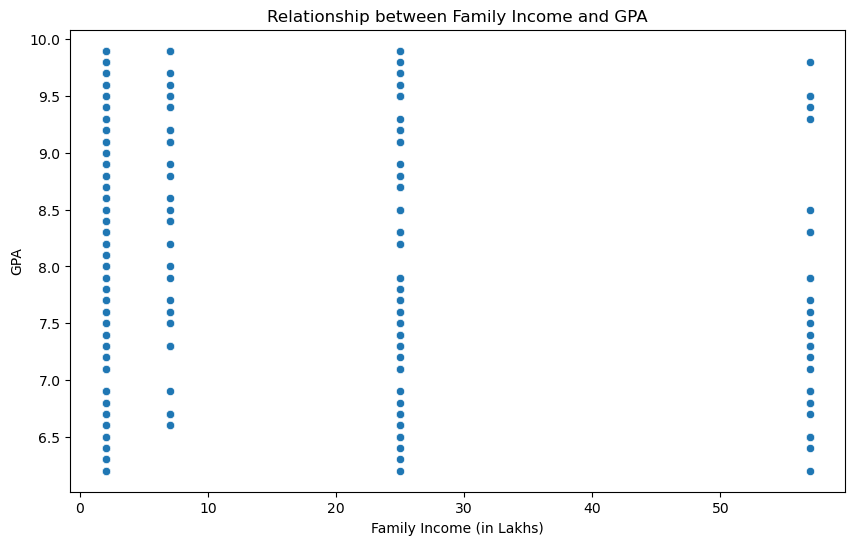

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(r"C:\Users\91797\Downloads\Data analyst Data.xlsx", sheet_name="All Events Data")

# Clean the "Family Income" column by removing ' Lakh' and non-numeric characters (e.g., '7+')
df["Family Income"] = df["Family Income"].str.replace(" Lakh", "").str.replace(r'\D', '', regex=True)

# Convert to float, and handle errors by coercing invalid values to NaN
df["Family Income"] = pd.to_numeric(df["Family Income"], errors='coerce')

# Clean the "CGPA" column in case it has non-numeric values
df["CGPA"] = pd.to_numeric(df["CGPA"], errors='coerce')

# Calculate the Pearson correlation coefficient between Family Income and CGPA
correlation = df["Family Income"].corr(df["CGPA"])

# Display the correlation
print(f"Pearson correlation between Family Income and GPA: {correlation}")

# Plot the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Family Income", y="CGPA", data=df)
plt.title("Relationship between Family Income and GPA")
plt.xlabel("Family Income (in Lakhs)")
plt.ylabel("GPA")
plt.show()
